<a href="https://colab.research.google.com/github/Hc1023/colab/blob/master/hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print("hello world!")
print("My name is Sisi, and this is my first time to use COLAB!")

hello world!
My name is Sisi, and this is my first time to use COLAB!


## 准备工作
###将Google Drive与colab关联

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

### 设置GPU运行
依次点击 Edit > Notebook settings 或者 Runtime > Change runtime type ，选择GPU作为Hardware accelerator。

## 代码段尝试

### 获取当前文件目录
发现默认是在colab上的，一个临时的虚拟机憨憨，我后面得想办法把它转到google drive中。

In [3]:
!pwd
!ls

/content
sample_data


### mounting google drive in your VM
直接在google drive中创建了一个foo.txt文件，并且写入文本“Hello Google Drive!”

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [9]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

### load and plot an example dataset

In [4]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
)

alt.Chart(...)

### imshow

In [0]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   198k      0 --:--:-- --:--:-- --:--:--  198k


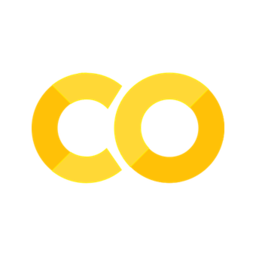

In [6]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

## Keras上的代码示例[mnist_cnn.py](<http://t.cn/REe2bqF>)

### 安装库

In [10]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131289 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

### 挂载google drive

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive  -o nonempty

### 安装Keras

In [0]:
!pip install -q keras

### 运行示例代码

In [16]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


W0813 03:05:27.194115 140019166295936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 03:05:27.231390 140019166295936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 03:05:27.239735 140019166295936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 03:05:27.280600 140019166295936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 03:05:27.283233 140019166295936 deprecation_wrapp

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0813 03:05:27.484512 140019166295936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.2523 - acc: 0.9221 - val_loss: 0.0552 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0881 - acc: 0.9739 - val_loss: 0.0394 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0663 - acc: 0.9800 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0557 - acc: 0.9834 - val_loss: 0.0322 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0474 - acc: 0.9858 - val_loss: 0.0277 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0399 - acc: 0.9880 - val_loss: 0.0316 - val_acc: 0.9897
Epoch 7/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0373 - acc: 0.9889 - val_loss: 0.0267 - val_a

### 直接运行classifier_sample
在drive中上传了.py文件运行

In [22]:
!python3 'drive/Colab Notebooks/Untitled.py'

cuda:0
170500096it [00:01, 86620290.35it/s]                   
Files already downloaded and verified
<Figure size 640x480 with 1 Axes>
truck truck horse  ship
[1,  2000] loss: 2.159
[1,  4000] loss: 1.819
[1,  6000] loss: 1.654
[1,  8000] loss: 1.564
[1, 10000] loss: 1.509
[1, 12000] loss: 1.466
[2,  2000] loss: 1.400
[2,  4000] loss: 1.346
[2,  6000] loss: 1.337
[2,  8000] loss: 1.303
[2, 10000] loss: 1.275
[2, 12000] loss: 1.284
Finished Training
<Figure size 640x480 with 1 Axes>
GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship   car
Accuracy of the network on the 10000 test images: 53 %
Accuracy of plane : 43 %
Accuracy of   car : 84 %
Accuracy of  bird : 52 %
Accuracy of   cat : 24 %
Accuracy of  deer : 31 %
Accuracy of   dog : 40 %
Accuracy of  frog : 80 %
Accuracy of horse : 57 %
Accuracy of  ship : 74 %
Accuracy of truck : 46 %


## 数据传输

### URL下载到drive

In [25]:
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P \
  'drive/Colab Notebooks'

--2019-08-13 03:28:29--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170 (1.1K) [text/plain]
Saving to: ‘drive/Colab Notebooks/Titanic.csv’

Titanic.csv         100%[===================>]   1.14K  --.-KB/s    in 0s      

2019-08-13 03:28:31 (73.9 MB/s) - ‘drive/Colab Notebooks/Titanic.csv’ saved [1170/1170]



### pandas读取

In [27]:
import pandas as pd
titanic = pd.read_csv('drive/Colab Notebooks/Titanic.csv')
titanic.head(5)

,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,1,1st,Male,Child,No,0
1,2,2nd,Male,Child,No,0
2,3,3rd,Male,Child,No,35
3,4,Crew,Male,Child,No,0
4,5,1st,Female,Child,No,0


### git clone repo

In [28]:
!git clone https://github.com/wxs/keras-mnist-tutorial.git 'drive/Colab Notebooks/keras-mnist-tutorial'

Cloning into 'drive/Colab Notebooks/keras-mnist-tutorial'...
remote: Enumerating objects: 26, done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (26/26), done.
Checking out files: 100% (4/4), done.


Reference:[Google Colab Free GPU Tutorial](<https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d>)